In [1]:
data <- read.csv("https://media.githubusercontent.com/media/JasonJTX/Data-Mining/refs/heads/main/Association%20Rule%20Mining%20in%20Retail%20Store/Assignment-1_Data.csv", sep=";")

In [25]:
install.packages("arules")
library(arules)
install.packages('Matrix')
install.packages("arulesViz")
library(arulesViz)
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
# using datasets from both regions
data.UK <- data[data$Country=="United Kingdom",]
data.fr <- data[data$Country=="France",]
data.UK <- na.omit(data.UK)
data.fr <- na.omit(data.fr)

In [32]:
# make transaction list
transactions.fr <- split(data.fr$Itemname,data.fr$BillNo)
transactions.UK <- split(data.UK$Itemname,data.UK$BillNo)

# make transaction list from both regions
list_transactions.fr <- as(transactions.fr, 'transactions')
list_transactions.UK <- as(transactions.UK, 'transactions')

Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


In [33]:
# Applying FP-Growth on the France data set
# Convert transactions to a suitable format
transactions_fr <- as(list_transactions.fr, "transactions")

# Mine frequent itemsets with FP-Growth
frequent_itemsets_fr <- apriori(
  transactions_fr,
  parameter = list(support = 0.0892, confidence = 0.8, target = "rules")
)

# Sort rules by lift
rules_fpgrowth_fr <- sort(frequent_itemsets_fr, by = "lift")

# Applying FP-Growth on the UK data set
# Convert transactions to a suitable format
transactions_UK <- as(list_transactions.UK, "transactions")

# Mine frequent itemsets with adjusted support
frequent_itemsets_UK <- apriori(
  transactions_UK,
  parameter = list(support = 0.0095, confidence = 0.8, target = "rules")
)

# Sort rules by lift
rules_fpgrowth_UK <- sort(frequent_itemsets_UK, by = "lift")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5  0.0892      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 34 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1543 item(s), 389 transaction(s)] done [0.00s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5  0.0095      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
  

In [34]:
# ECLAT ALGORITHM

# using eclat on the France data set
frequent_eclat.fr <- eclat(transactions.fr, parameter = list(supp=0.0892))
frequent_eclat.fr <- sort(frequent_eclat.fr, by = 'support')
rules_eclat.fr <- ruleInduction(frequent_eclat.fr, confidence = 0.8)
rules_eclat.fr <- sort(rules_eclat.fr, by='lift')

# using eclat on the UK data set
# note: support is increased since the initial had too many rules
frequent_eclat.UK <- eclat(transactions.UK, parameter = list(supp=0.0100))
frequent_eclat.UK <- sort(frequent_eclat.UK, by = 'support')
rules_eclat.UK <- ruleInduction(frequent_eclat.UK, confidence = 0.8)
rules_eclat.UK <- sort(rules_eclat.UK, by='lift')

Warning message in asMethod(object):
“removing duplicated items in transactions”


Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE  0.0892      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 34 

create itemset ... 
set transactions ...[1543 item(s), 389 transaction(s)] done [0.00s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating bit matrix ... [29 row(s), 389 column(s)] done [0.00s].
writing  ... [58 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


Warning message in asMethod(object):
“removing duplicated items in transactions”


Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.01      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 166 

create itemset ... 
set transactions ...[3833 item(s), 16649 transaction(s)] done [0.13s].
sorting and recoding items ... [616 item(s)] done [0.01s].
creating sparse bit matrix ... [616 row(s), 16649 column(s)] done [0.00s].
writing  ... [971 set(s)] done [0.50s].
Creating S4 object  ... done [0.00s].


In [35]:
# APRIORI ALGORITHM

# frequent itemset using the apriori algorithm in arules on the france dataset
frequent_apriori.fr <- apriori(list_transactions.fr, parameter = list(target = "frequent itemsets"), support = 0.0892)
inspect(frequent_apriori.fr)
rules_apriori.fr <- ruleInduction(frequent_apriori.fr, confidence = 0.8)
rules_apriori.fr <- sort(rules_apriori.fr, by='lift')

# frequent itemset using the apriori algorithm in arules on the UK dataset
# note: support is increased since the initial had too many rules
frequent_apriori.UK <- apriori(list_transactions.UK,parameter = list(target = "frequent itemsets"),support = 0.0100)
inspect(frequent_apriori.UK)
rules_apriori.UK <- ruleInduction(frequent_apriori.UK, confidence = 0.8)
rules_apriori.UK <- sort(rules_apriori.UK, by='lift')

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5  0.0892      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 34 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1543 item(s), 389 transaction(s)] done [0.01s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [58 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                                    support count
[1]  {TEA PARTY BIRTHDAY CARD}             0.09511568    37
[2]  {MINI PAINT SET VINTAGE}              0.10539846    41
[3]  {DOLLY GIRL LUNCH BOX}                0.1002

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
main	 =  Graph for 10 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

Warning message:
“Too many rules supplied. Only plotting the best 10 using ‘lift’ (change control parameter max if needed).”


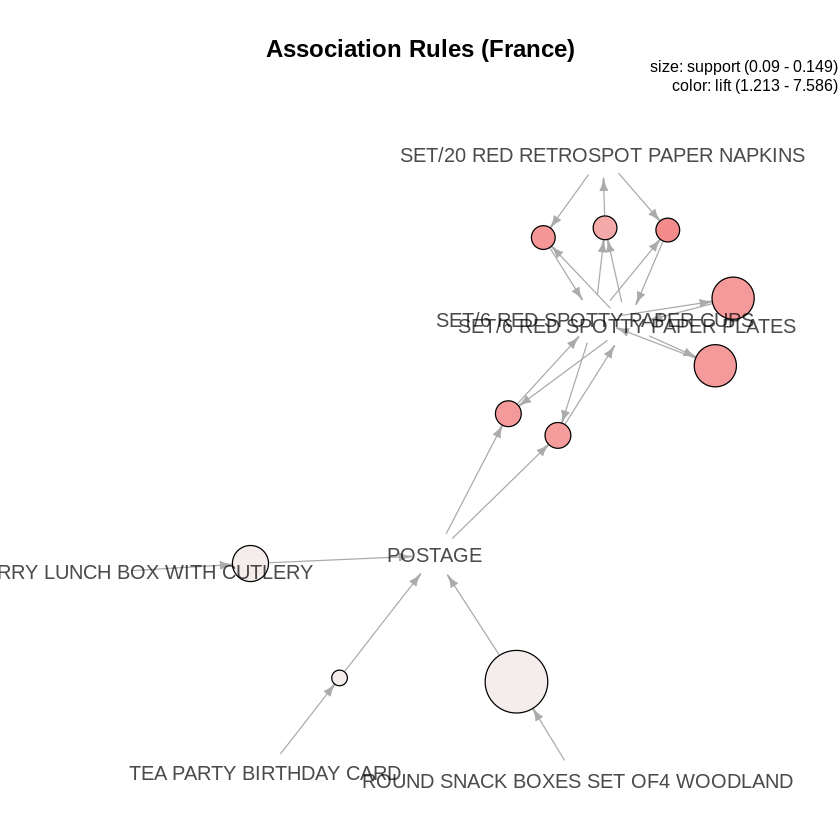

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
main	 =  Graph for 10 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

Warning message:
“Too many rules supplied. Only plotting the best 10 using ‘lift’ (change control parameter max if needed).”


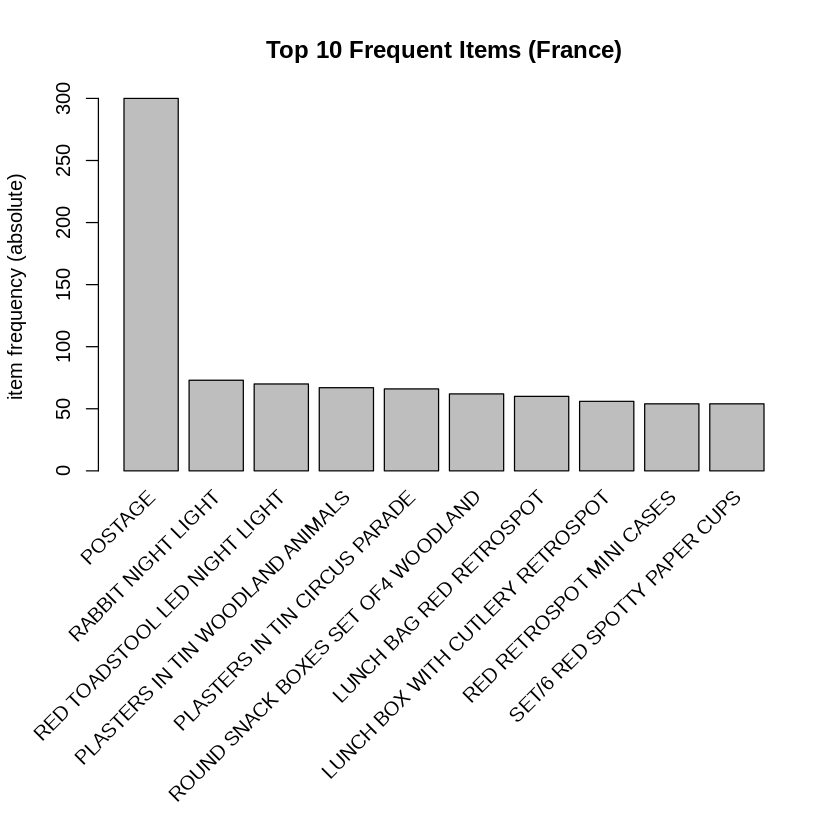

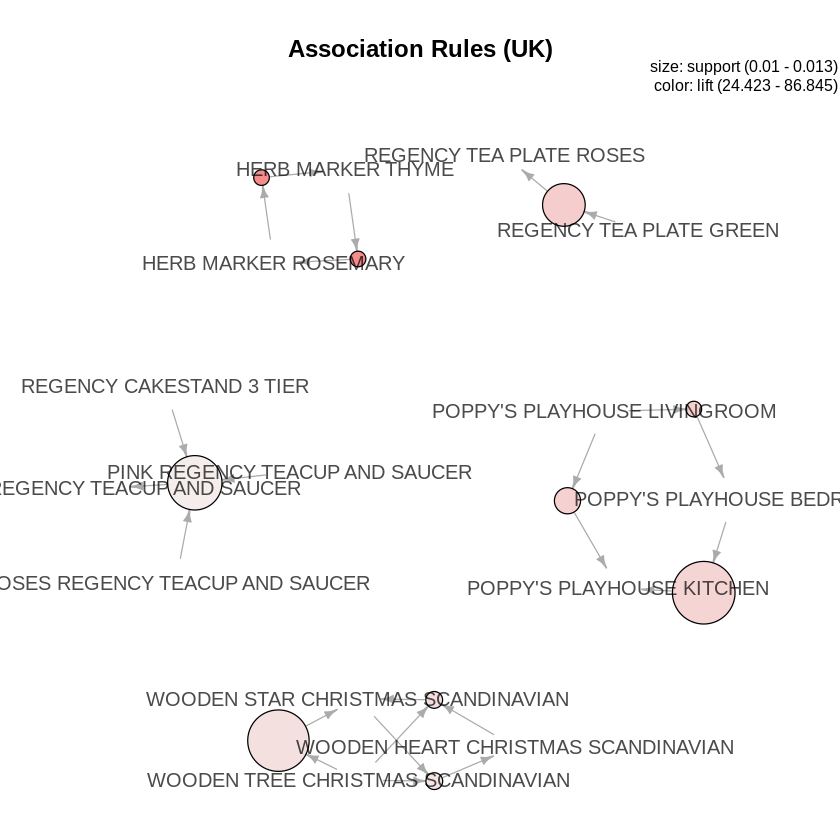

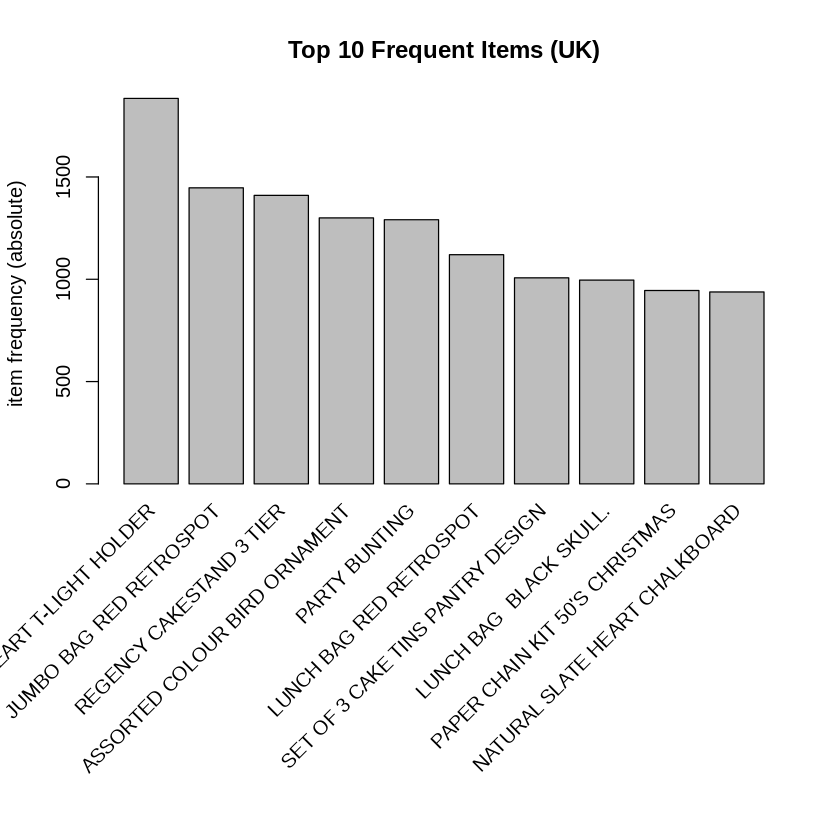

In [37]:
# Plot top 10 rules for France using Apriori
plot(rules_apriori.fr, method = "graph", engine = "igraph", control = list(type = "items"), max = 10,
     main = "Association Rules (France)")

# Plot top 10 frequent items for France
itemFrequencyPlot(list_transactions.fr, topN = 10, type = "absolute", main = "Top 10 Frequent Items (France)")

# Plot top 10 rules for UK using Apriori
plot(rules_apriori.UK, method = "graph", engine = "igraph", control = list(type = "items"), max = 10,
     main = "Association Rules (UK)")

# Plot top 10 frequent items for UK
itemFrequencyPlot(list_transactions.UK, topN = 10, type = "absolute", main = "Top 10 Frequent Items (UK)")
